In [1]:
import pandas as pd 
import numpy as np
import nltk
from textblob import TextBlob
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.metrics import TrigramAssocMeasures
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
#check if all nltk files are downloaded
nltk.download()

In [2]:
df = pd.read_csv('Job ID 179988 test_data_part1_and_2.csv')

In [3]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.shape

(57650, 4)

In [5]:
text = " ".join(review for review in df.text)

In [6]:
lower_text = text.lower()

In [7]:
word_tokens = nltk.word_tokenize(lower_text)
print (word_tokens[:50])

['look', 'at', 'her', 'face', ',', 'it', "'s", 'a', 'wonderful', 'face', 'and', 'it', 'means', 'something', 'special', 'to', 'me', 'look', 'at', 'the', 'way', 'that', 'she', 'smiles', 'when', 'she', 'sees', 'me', 'how', 'lucky', 'can', 'one', 'fellow', 'be', '?', 'she', "'s", 'just', 'my', 'kind', 'of', 'girl', ',', 'she', 'makes', 'me', 'feel', 'fine', 'who', 'could']


In [8]:
stopword = set(stopwords.words('english')) 
removing_stopwords = [word for word in word_tokens if word not in stopword]

In [9]:
print(removing_stopwords[:50])

['look', 'face', ',', "'s", 'wonderful', 'face', 'means', 'something', 'special', 'look', 'way', 'smiles', 'sees', 'lucky', 'one', 'fellow', '?', "'s", 'kind', 'girl', ',', 'makes', 'feel', 'fine', 'could', 'ever', 'believe', 'could', 'mine', '?', "'s", 'kind', 'girl', ',', 'without', "'m", 'blue', 'ever', 'leaves', 'could', ',', 'could', '?', 'go', 'walk', 'park', 'holds', 'squeezes', 'hand', "'ll"]


In [10]:
clean_wordlist = []
for word in removing_stopwords:
    symbols = "!@#$%^&*()_+{}:\"<>?,./;[]-='"
    for i in range(0,len(symbols)):
        word = word.replace(symbols[i],"")
    if len(word) > 0:
        clean_wordlist.append(word)

In [11]:
N_list = [word for word in clean_wordlist if len(word)>1]
print(N_list[:50])

['look', 'face', 'wonderful', 'face', 'means', 'something', 'special', 'look', 'way', 'smiles', 'sees', 'lucky', 'one', 'fellow', 'kind', 'girl', 'makes', 'feel', 'fine', 'could', 'ever', 'believe', 'could', 'mine', 'kind', 'girl', 'without', 'blue', 'ever', 'leaves', 'could', 'could', 'go', 'walk', 'park', 'holds', 'squeezes', 'hand', 'll', 'go', 'walking', 'hours', 'talking', 'things', 'plan', 'kind', 'girl', 'makes', 'feel', 'fine']


In [12]:
#(1) word frequency
freq = FreqDist(N_list)
print (freq.most_common(17))

[('nt', 178827), ('love', 93952), ('know', 72503), ('like', 63570), ('re', 62692), ('got', 61047), ('oh', 59744), ('ll', 59360), ('na', 48451), ('one', 44703), ('ve', 44219), ('go', 43861), ('time', 43544), ('get', 43455), ('baby', 41743), ('see', 41023), ('want', 39832)]


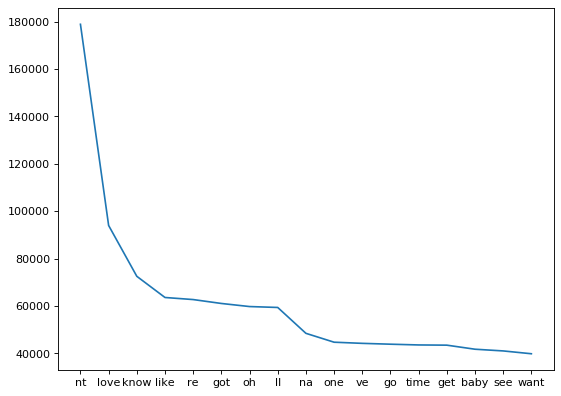

In [13]:
x, y = zip(*freq.most_common(17))
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y)
plt.show()

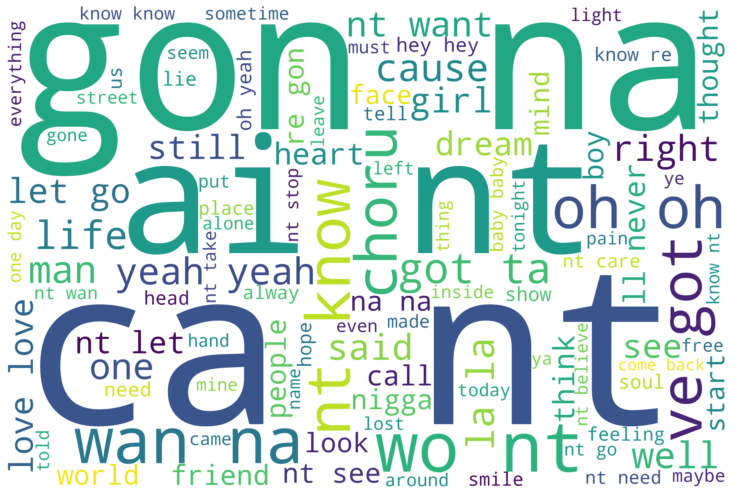

In [14]:
t = " ".join(review for review in N_list)
wordcloud = WordCloud(max_words=100, background_color="white",width=3000,height=2000).generate(t)
#plt.figure()
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
#(2) word length
moby_frequency_frame = pd.DataFrame(freq.most_common(),columns=["token", "frequency"])
length = max(moby_frequency_frame.token.str.len())
longest = moby_frequency_frame.token.str.extractall("(?P<long>.{{{}}})".format(length))
longest_word_length = (longest.long.iloc[0], length)
print(longest_word_length)

('maybepregnantorondrugsoronwelfareontopoftheworldonthehonorrollonparoleonthedodgersonthebackofmilkcartons', 104)


In [16]:
length = 0 
w = []
for word in freq:
    if len(word) > length:
        length = len(word)
        w = word
    else:
        pass
    
print("length of the largest word is : " + str(length))
print("largest word is :" + w)

length of the largest word is : 104
largest word is :maybepregnantorondrugsoronwelfareontopoftheworldonthehonorrollonparoleonthedodgersonthebackofmilkcartons


In [17]:
#(3) lexical diversity
total_tokens = len(word_tokens)
unique_tokens = len(set(word_tokens))
#type token ratio:
type_token_ratio = unique_tokens/float(total_tokens)
#Guiraud's Root TTR :
r = unique_tokens/math.sqrt(total_tokens)
#LogTTR(Herdan's C):
c= math.log(unique_tokens)/math.log(total_tokens)
#Carroll's Corrected TTR:
cttr = unique_tokens/math.sqrt(2*(total_tokens))
#Summer's index:
s = math.log(math.log(unique_tokens))/math.log(math.log(total_tokens ))
print("Type Token Ratio :" +str(type_token_ratio))
print("Guiraud's Root TTR :" + str(r))
print("LogTTR(Herdan's C) :" + str(c))
print("Carroll's Corrected TTR :" + str(cttr))
print("Summer's index :" + str(s))

Type Token Ratio :0.006774961037238452
Guiraud's Root TTR :25.77635406573193
LogTTR(Herdan's C) :0.6970806496231016
Carroll's Corrected TTR :18.22663475414448
Summer's index :0.8712444655213627


In [18]:
#(4) lexical density
total_tokens = len(word_tokens)
unique_tokens = len(set(word_tokens))
print(total_tokens)
print(unique_tokens)
lexical_density = (unique_tokens/float(total_tokens)) * 100

print("Lexical Density :" + str(lexical_density))


14475360
98070
Lexical Density :0.6774961037238453


In [19]:
#(5) bigrams and trigrams analysis
#Bigrams
filterstops = lambda w: len(w) < 3 or w in stopword
finder = BigramCollocationFinder.from_words(removing_stopwords)
finder.apply_word_filter(filterstops)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio,20)
#Trigrams
finder = TrigramCollocationFinder.from_words(removing_stopwords)
finder.apply_word_filter(filterstops)
Trigrams = finder.nbest(TrigramAssocMeasures.likelihood_ratio,20)

In [20]:
print(bigrams)
print(Trigrams)

[("'ve", 'got'), ("n't", 'know'), ("'ll", 'never'), ("n't", 'want'), ("'re", 'gon'), ('little', 'bit'), ('yeah', 'yeah'), ("n't", 'care'), ('brand', 'new'), ('new', 'york'), ('close', 'eyes'), ('feel', 'like'), ('far', 'away'), ('set', 'free'), ('every', 'day'), ("'ve", 'seen'), ('say', 'goodbye'), ('come', 'back'), ("n't", 'let'), ('hey', 'hey')]
[('got', "'ve", 'got'), ('since', "'ve", 'got'), ("'ve", 'got', "n't"), ('know', "'ve", 'got'), ("'ve", 'got', 'long'), ("'ve", 'got', "'ve"), ("'ve", 'got', 'known'), ("'ve", 'got', 'seen'), ("n't", "'ve", 'got'), ("'ve", 'got', 'nothing'), ("'ve", 'got', 'lot'), ('things', "'ve", 'got'), ("'ve", 'got', 'something'), ("'ve", 'got', 'feeling'), ("'ve", 'got', 'money'), ('think', "'ve", 'got'), ("'cause", "'ve", 'got'), ("'ve", 'got', 'far'), ("'ve", 'got', 'much'), ("'ve", 'got', 'nothin')]


In [21]:
#(6) Sentiment Analysis
def get_sentiment(song):
    obj = TextBlob(song)
    return obj.sentiment.polarity

        
positive = 0
neutral = 0
negative =0
for i in range(57650):
    song = df['text'][i]
    sentiment = get_sentiment(song)
    if (sentiment) == 0:
        neutral += 1
    elif (sentiment) > 0:
        positive += 1
    else:
        negative += 1
    


In [22]:
print("positive = " + str((positive/57650)*100))
print("neutral = " + str((neutral/57650)*100))
print("negative = " + str((negative/57650)*100))

positive = 74.42844752818733
neutral = 1.0910667823070253
negative = 24.480485689505638


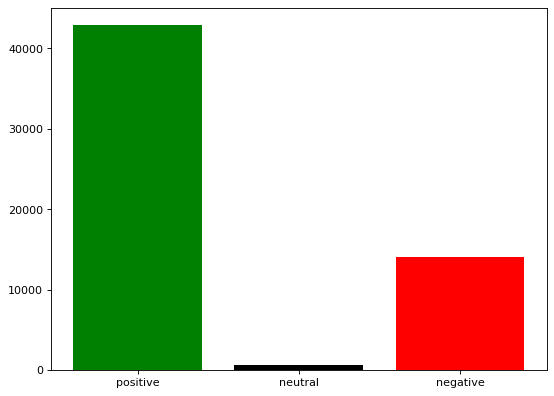

In [23]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
labels = ["positive" ,"neutral","negative"]
values = [positive,neutral,negative]
plt.bar(labels,values,color=['green', 'black', 'red'])
plt.show()

In [24]:
#TF_IDF
corpus = []
for song in range(57650):
    corpus.append(df['text'][song])

In [25]:
sample = corpus[0].split('\n')
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(sample)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
TF_IDF = pd.DataFrame(denselist, columns=feature_names)
    

In [26]:
print(feature_names)

['about', 'all', 'and', 'at', 'be', 'believe', 'blue', 'can', 'could', 'do', 'ever', 'face', 'feel', 'fellow', 'fine', 'for', 'girl', 'go', 'hand', 'her', 'holds', 'hours', 'how', 'if', 'in', 'it', 'just', 'kind', 'leaves', 'll', 'look', 'lucky', 'makes', 'me', 'means', 'mine', 'my', 'of', 'on', 'one', 'park', 'plan', 'sees', 'she', 'smiles', 'something', 'special', 'squeezes', 'talking', 'that', 'the', 'things', 'to', 'walk', 'walking', 'way', 'we', 'what', 'when', 'who', 'without', 'wonderful']


In [27]:
#part_2
#Type-ahead prediction
keys = []
for title in range(57650):
    song = df.song[title].lower()
    keys.append(song)


In [35]:
class TrieNode(): 
    def __init__(self): 
        self.children = {} 
        self.last = False
  
class Trie(): 
    def __init__(self):           
        self.root = TrieNode() 
        self.word_list = [] 
  
    def formTrie(self, keys):  
        for key in keys: 
            self.insert(key)  
  
    def insert(self, key):         
        node = self.root 
        for a in list(key): 
            if not node.children.get(a): 
                node.children[a] = TrieNode() 
  
            node = node.children[a] 
  
        node.last = True
  
    def search(self, key): 
        node = self.root 
        found = True
  
        for a in list(key): 
            if not node.children.get(a): 
                found = False
                break
  
            node = node.children[a] 
  
        return node and node.last and found 
    def suggestionsRec(self, node, word): 
            
        if node.last: 
            self.word_list.append(word) 
  
        for a,n in node.children.items(): 
            self.suggestionsRec(n, word + a) 
  
    def printAutoSuggestions(self, key): 
        node = self.root 
        not_found = False
        temp_word = '' 
  
        for a in list(key): 
            if not node.children.get(a): 
                not_found = True
                break
  
            temp_word += a 
            node = node.children[a] 
  
        if not_found: 
            return 0
        elif node.last and not node.children: 
            return -1
  
        self.suggestionsRec(node, temp_word) 
  
        for s in self.word_list: 
            print(s) 
        return 1

In [36]:
key = input("Enter keyword : ")  
status = ["Not found", "Found"] 
 
t = Trie()  
t.formTrie(keys)  
comp = t.printAutoSuggestions(key) 

if comp == -1: 
    print("No other strings found with this prefix\n") 
elif comp == 0: 
    print("No string found with this prefix\n")

Enter keyword : like
like an angel passing through my room
like an avalanche
like a child
like a champion
like a california king
like a cat
like a rock
like a rolling stone
like a rose on the grave of love
like a river
like a refugee
like a real freak
like a rat does cheese
like a baby
like a bird
like a prayer
like a sunshower
like a summer thursday
like a surgeon
like a sad song
like a song
like a virgin
like a hurricane
like a hero
like a hemisphere
like a good girl
like a zombie
like a machine
like a fire
like a flower
like a flame
like a queen
like a drug
like a lover
like tonight
like to get to know you well
like the sun
like thunder
like you
like you do
like we never loved at all
like it this way
like it or not
like it like that
like i do
like i love you
like i used to
like i am
like i can
like i never left
like i would
like i'm invisible
like everybody else
like everyone she knows
like every time before
like eagles
like father like son
like lovers do
like someone in love
like s